# Random forest

Суть метода в том, чтобы обучить много деревьев решений на случайных подмножествах исходного датасета. Далее предсказание осредняется и это осредненное предсказание и есть ответ

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
titanic_data = pd.read_csv('titanic_train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'],
                     axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X) # функция для кодирования строковых значений
X.Age.median() # Будем заполнять медианным значением
X = X.fillna({'Age': X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
clf_rf = RandomForestClassifier()

In [4]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [5]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [6]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [7]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

___

# Задача 3.2.8

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

___

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15)

In [11]:
predictions = rf.predict(X_test)

___

> Продолжаем текст до задачи

In [12]:
best_clf = grid_search_cv_clf.best_estimator_

In [13]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [14]:
feature_importances = best_clf.feature_importances_

In [15]:
feature_importances

array([0.12668477, 0.08674813, 0.04702312, 0.02368515, 0.18333554,
       0.28899875, 0.18350398, 0.01872605, 0.00847295, 0.03282157])

In [20]:
feature_importances_df = pd.DataFrame({'feature':list(X_train),
                                      'feature_importances': feature_importances})

In [24]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.288999
6,Sex_male,0.183504
4,Fare,0.183336
0,Pclass,0.126685
1,Age,0.086748
2,SibSp,0.047023
9,Embarked_S,0.032822
3,Parch,0.023685
7,Embarked_C,0.018726
8,Embarked_Q,0.008473


___

# Задача 3.2.13

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

___

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
df = pd.read_csv('heart.csv')

In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
X, y = df.drop('target', axis=1), df.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [64]:
feature_importances = rf.feature_importances_

<AxesSubplot:>

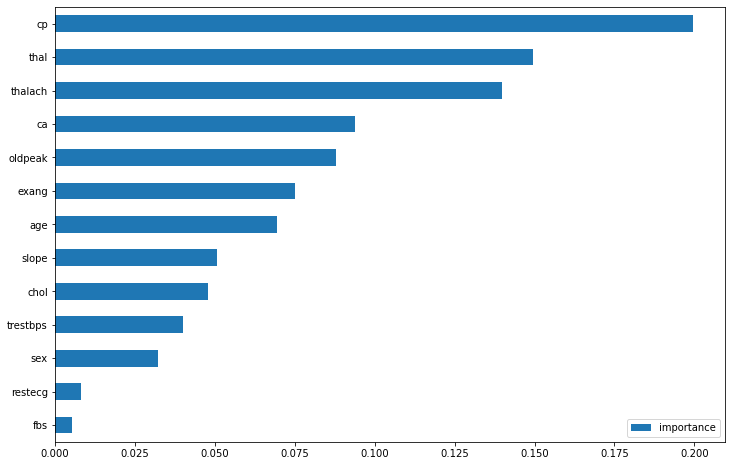

In [65]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

___

# Задачи 3.5 

___

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Подгружаем датасет:

In [72]:
df = pd.read_csv('training_mush.csv')

In [90]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [85]:
X, y = df.drop('class', axis=1), df['class']

In [89]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


### Задача 3.5.3 

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

In [111]:
clf = RandomForestClassifier(random_state=0)

In [112]:
parametrs = {'n_estimators': range(10,60,10),
             'max_depth': range(1,13,2),
             'min_samples_leaf': range(1,8),
             'min_samples_split': range(2,10,2)}

In [113]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [114]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 60, 10)})

In [115]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [118]:
best_rf = grid_search_cv_clf.best_estimator_

In [119]:
feature_importances = best_rf.feature_importances_

<AxesSubplot:>

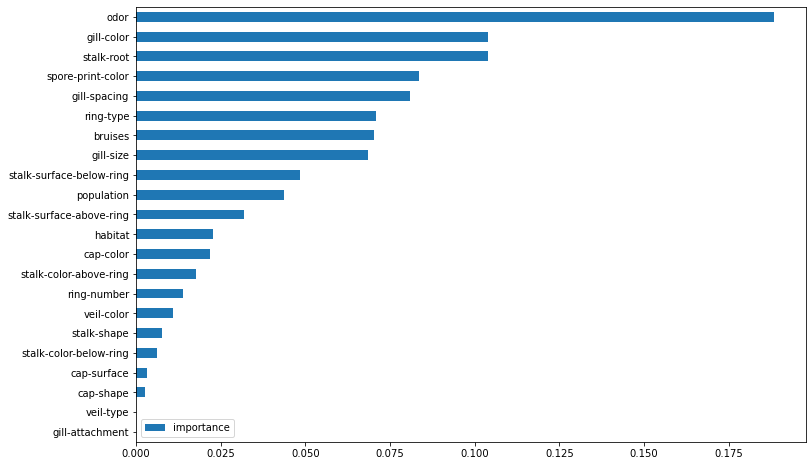

In [120]:
imp = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# Задача 3.5.5

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 
Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [125]:
X_test = pd.read_csv('testing_mush.csv')

In [126]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [128]:
y_pred = best_rf.predict(X_test)

In [129]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

___

# Задача 3.5.6

___

In [131]:
y_true = pd.read_csv('testing_y_mush.csv')

<AxesSubplot:>

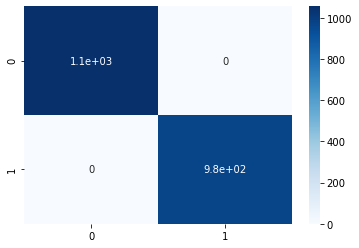

In [133]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")

___

____

# Задача 3.5.7

Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

___

In [214]:
df = pd.read_csv('invasion.csv')

In [228]:
X_test = pd.read_csv('operative_information.csv')

Сразу обрабатываем данные: столбец с классами из названий преобразовываем в числа

In [215]:
transport = {'transport': 0, 'fighter': 1, 'cruiser': 2}

In [216]:
df['class'] = df['class'].map(transport)

In [217]:
df

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,0,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,0,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,1,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,0,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,1,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,1,8.278256,8.353756,268.121561,0.132661,361911,13.905809


Посмотрим (просто так) количество кораблей по классам

In [218]:
df.groupby('class').nunique()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
class,,,,,,
0,205,205,205,205,205,205
1,225,225,225,225,225,225
2,70,70,70,70,70,70


In [219]:
X_train, y_train = df.drop('class', axis=1), df['class']

In [220]:
X_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [221]:
clf = RandomForestClassifier(random_state=0)

In [222]:
parametrs = {'n_estimators': range(1,60,10),
             'max_depth': range(1,13,2)}

In [223]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3)

In [224]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(1, 60, 10)})

In [225]:
best_clf = grid_search_cv_clf.best_estimator_

In [230]:
y_pred = best_clf.predict(X_test)

In [238]:
y_pred_df = pd.DataFrame(y_pred)

In [243]:
y_pred_df.rename(columns={0: 'ship_type'})

,ship_type
0,1
1,0
2,0
3,0
4,1
...,...
1495,1
1496,1
1497,0
1498,1


In [244]:
s = pd.Series(y_pred)

In [245]:
s.groupby(s).count()

0    595
1    675
2    230
dtype: int64

In [246]:
feature_importances = best_clf.feature_importances_

<AxesSubplot:>

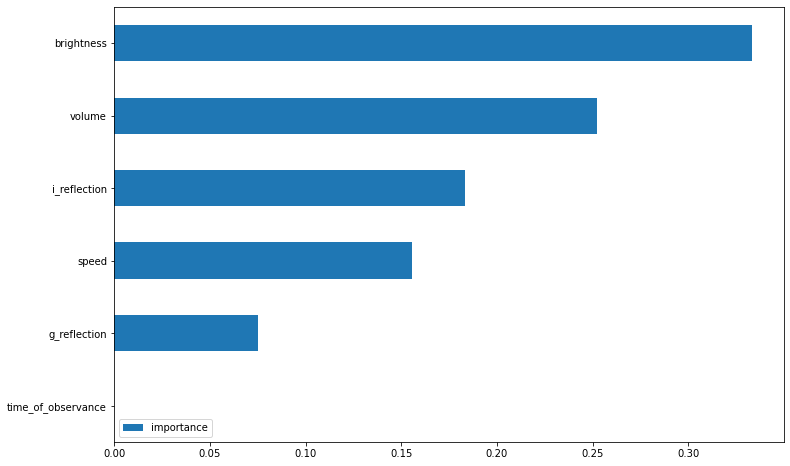

In [248]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [249]:
X_train

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


___

#  Задача 3.5.9

Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

___

In [250]:
df = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [252]:
df.head(20)

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
5,206.6,13.0,27.2712,-0.233592,0,1,1,1
6,293.0,263.0,38.6760,-0.870781,0,1,1,1
7,83.1,205.0,10.9692,0.925809,0,1,1,1
8,53.0,305.0,6.9960,0.327122,0,1,1,1
9,35.1,189.0,4.6332,-0.726962,0,1,1,1


<AxesSubplot:>

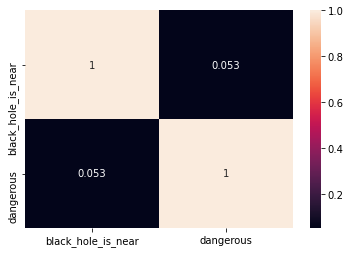

In [259]:
df2 = df[{'black_hole_is_near', 'dangerous'}]
corr = df2.corr(method="pearson")
sns.heatmap(df2.corr(), annot=True)

<AxesSubplot:>

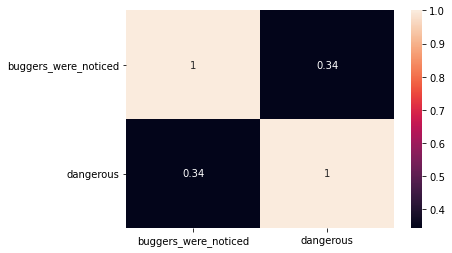

In [260]:
df2 = df[{'buggers_were_noticed', 'dangerous'}]
corr = df2.corr(method="pearson")
sns.heatmap(df2.corr(), annot=True)

<AxesSubplot:>

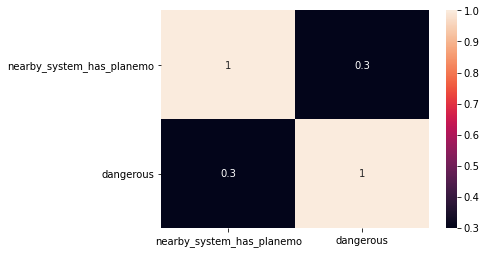

In [261]:
df2 = df[{'nearby_system_has_planemo', 'dangerous'}]
corr = df2.corr(method="pearson")
sns.heatmap(df2.corr(), annot=True)